In [1]:
import torch 
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import v2
from torch.utils.data import DataLoader,random_split,WeightedRandomSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter

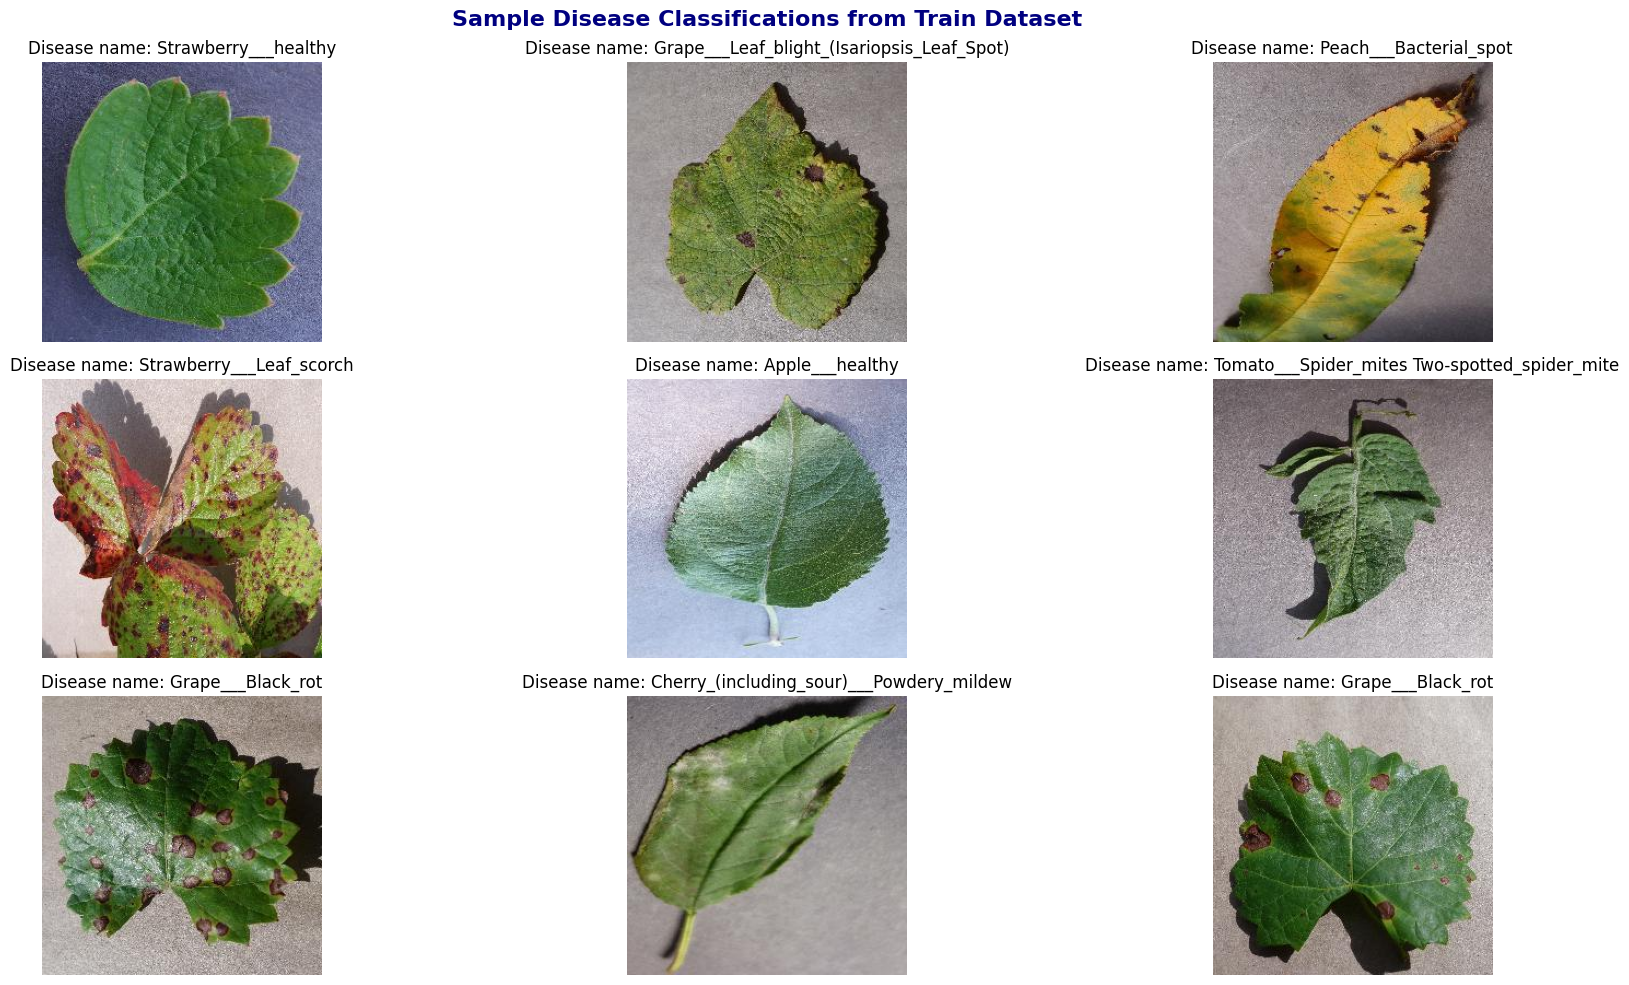

In [2]:
plotdata=datasets.ImageFolder(root=r"C:\Users\Avijit\Desktop\DATASET\PlantVillage")
classname=plotdata.classes
plt.style.use("seaborn-v0_8-muted")
plt.figure(figsize=(20,10))
rows,cols=3,3
for i in range(1,rows*cols+1):
    plt.subplot(rows,cols,i)
    randomid=torch.randint(0,len(plotdata),size=[1]).item()
    img,label=plotdata[randomid]
    plt.imshow(img)
    plt.title(f"Disease name: {classname[label]}")
    plt.axis(False)
plt.suptitle("Sample Disease Classifications from Train Dataset", fontsize=16, fontweight='bold', color='navy')
plt.tight_layout()
plt.show()

In [4]:
import os

root = r"C:\Users\Avijit\Desktop\DATASET\PlantVillage"
for class_folder in os.listdir(root):
    class_path = os.path.join(root, class_folder)
    if os.path.isdir(class_path):
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        print(f"{class_folder}: {len(images)} images")


Apple___Apple_scab: 2016 images
Apple___Black_rot: 1987 images
Apple___Cedar_apple_rust: 1760 images
Apple___healthy: 2008 images
Blueberry___healthy: 1816 images
Cherry_(including_sour)___healthy: 1826 images
Cherry_(including_sour)___Powdery_mildew: 1683 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1590 images
Corn_(maize)___Common_rust_: 1907 images
Corn_(maize)___healthy: 1859 images
Corn_(maize)___Northern_Leaf_Blight: 1908 images
Grape___Black_rot: 1888 images
Grape___Esca_(Black_Measles): 1920 images
Grape___healthy: 1692 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722 images
Orange___Haunglongbing_(Citrus_greening): 2010 images
Peach___Bacterial_spot: 1838 images
Peach___healthy: 1728 images
Pepper__bell___Bacterial_spot: 997 images
Pepper__bell___healthy: 1478 images
Potato___Early_blight: 2149 images
Potato___healthy: 1854 images
Potato___Late_blight: 2131 images
Raspberry___healthy: 1781 images
Soybean___healthy: 2022 images
Squash___Powdery_mildew: 173

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.6784315].


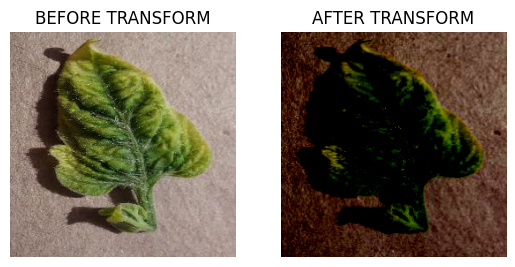

In [4]:
from pathlib import Path
from PIL import Image
import random
imagepath=Path(r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\DATASET\PlantVillage")
data_transform = v2.Compose([
    v2.Resize((224, 224)),                            # Resize to AlexNet input size
    v2.ToImage(),                                     # Needed before color transforms
    v2.RandomHorizontalFlip(p=0.3),                   # Flip
    v2.RandomAutocontrast(p=0.2),                     # Random autocontrast
    v2.ToDtype(torch.float32, scale=True),            # Scale to [0, 1]
    v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])
def plot_original_transform(imagpath,transform):
    randomimglist=random.choice(list(imagepath.rglob('*.jpg')))
    image=Image.open(randomimglist).convert("RGB")
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("BEFORE TRANSFORM")
    plt.axis(False)
    transform_img=transform(image)
    plt.subplot(1,2,2)
    plt.imshow(transform_img.permute(1,2,0))
    plt.title("AFTER TRANSFORM")
    plt.axis(False)
plot_original_transform(imagepath,data_transform)

In [5]:
torch.cuda.empty_cache()

In [6]:
from collections import Counter
import matplotlib.pyplot as plt
def check_imbalance_class(data):
    labels=[sample[1] for sample in data]
    class_count=Counter(labels)
    
    class_names = data.classes

    for i, counts in class_count.items():
     print(f"{class_names[i]}: {counts}")
     
    counts=np.array(list(class_count.values()))
    imbalance_ratio=counts.max()/counts.min()
    print(f"CLASS IMBALANCE RATION : {imbalance_ratio:.2f}")


     
    plt.figure(figsize=(20, 5))
    plt.bar([class_names[i] for i in class_count.keys()], class_count.values())
    plt.xticks(rotation=60, ha='right', fontsize=6)  # rotated + smaller font
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.tight_layout()
    plt.show()

Apple___Apple_scab: 4032
Apple___Black_rot: 1987
Apple___Cedar_apple_rust: 1760
Apple___healthy: 2008
Blueberry___healthy: 1816
Cherry_(including_sour)___Powdery_mildew: 1683
Cherry_(including_sour)___healthy: 1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1590
Corn_(maize)___Common_rust_: 1907
Corn_(maize)___Northern_Leaf_Blight: 1908
Corn_(maize)___healthy: 1859
Grape___Black_rot: 1888
Grape___Esca_(Black_Measles): 1920
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722
Grape___healthy: 1692
Orange___Haunglongbing_(Citrus_greening): 2010
Peach___Bacterial_spot: 1838
Peach___healthy: 1728
Pepper__bell___Bacterial_spot: 997
Pepper__bell___healthy: 1478
Potato___Early_blight: 2149
Potato___Late_blight: 2131
Potato___healthy: 1854
Raspberry___healthy: 1781
Soybean___healthy: 2022
Squash___Powdery_mildew: 1736
Strawberry___Leaf_scorch: 1774
Strawberry___healthy: 1824
Tomato__Target_Spot: 1404
Tomato___Bacterial_spot: 1702
Tomato___Early_blight: 1920
Tomato___Late_blight: 1851
Toma

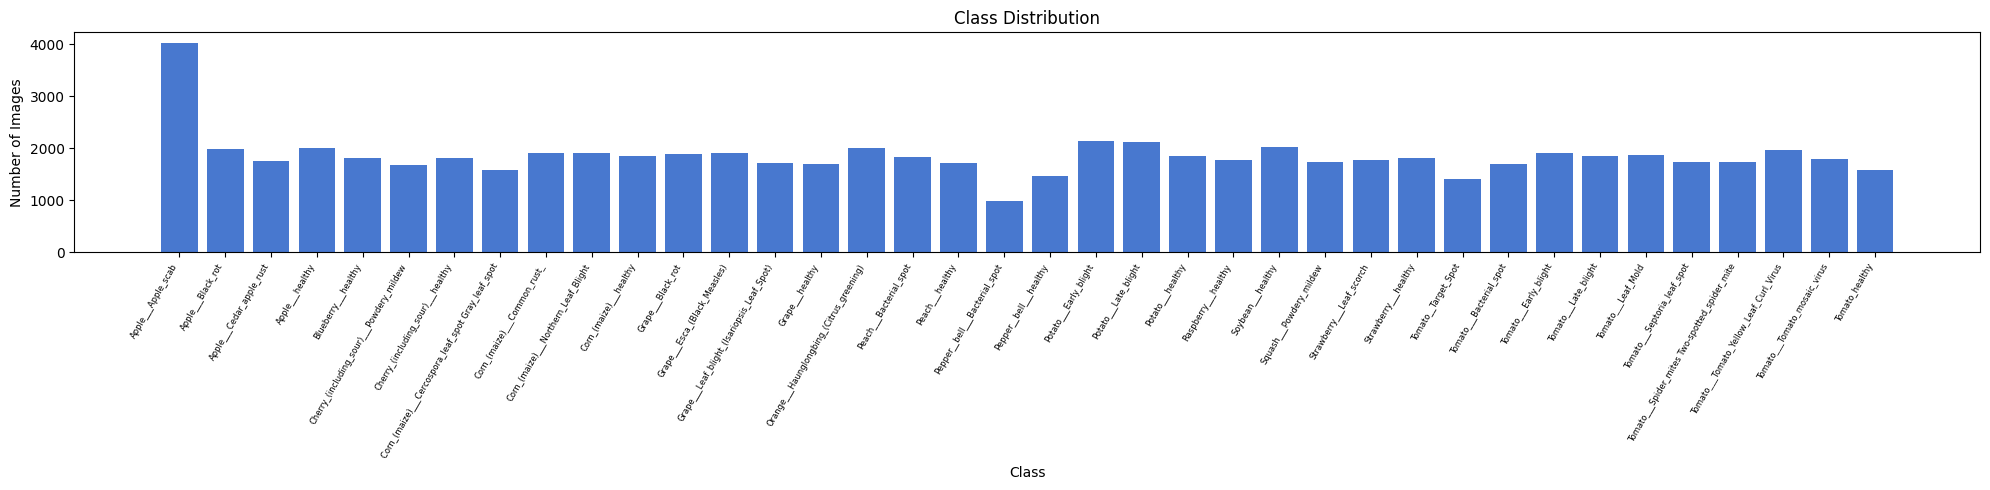

In [7]:
plantdata=plotdata
check_imbalance_class(plantdata)

In [6]:
import os
def getloader(root_directory, batch_size, train_ratio, image_size):
    # Transform (ImageNet normalization for pretrained models like EfficientNet)
    data_transform = v2.Compose([
    v2.Resize((224, 224)),                            # Resize to AlexNet input size
    v2.ToImage(),                                     # Needed before color transforms
    v2.RandomHorizontalFlip(p=0.3),                   # Flip
    v2.ToDtype(torch.float32, scale=True),            # Scale to [0, 1]
    v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
    ])
    # Load dataset
    full_dataset = datasets.ImageFolder(root=root_directory, transform=data_transform)

    # Train-test split
    train_size = int(train_ratio * len(full_dataset))
    test_size = len(full_dataset) - train_size
    train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

    # Calculate class weights for sampler (to handle class imbalance)
    train_labels = [train_dataset[i][1] for i in range(len(train_dataset))]
    class_counts = Counter(train_labels)
    class_weights = {label: 1.0 / count for label, count in class_counts.items()}
    sample_weights = [class_weights[label] for label in train_labels]
    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

    # Loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=os.cpu_count(),sampler=sampler,pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=os.cpu_count(),shuffle=True,pin_memory=True)

    return train_loader, test_loader

In [8]:
root=r"C:\Users\Avijit\Desktop\DATASET\PlantVillage"
trainloader,testloader=getloader(root,50,0.8,224)

In [9]:
from collections import Counter
import torch

def count_class_distribution(dataloader):
    class_counts = Counter()
    for _, labels in dataloader:
        if isinstance(labels, torch.Tensor):
            labels = labels.tolist()
        class_counts.update(labels)
    return class_counts
train_class_counts = count_class_distribution(trainloader)
test_class_counts = count_class_distribution(testloader)

print("Train Class Distribution:", dict(train_class_counts))
print("Test Class Distribution:", dict(test_class_counts))


Train Class Distribution: {6: 1435, 17: 1473, 9: 1458, 12: 1457, 30: 1486, 3: 1494, 1: 1458, 32: 1523, 34: 1527, 36: 1472, 7: 1475, 5: 1523, 29: 1461, 0: 1493, 15: 1507, 11: 1531, 13: 1469, 14: 1464, 20: 1417, 19: 1485, 37: 1475, 25: 1469, 10: 1531, 26: 1501, 23: 1486, 16: 1460, 22: 1488, 31: 1492, 33: 1486, 2: 1474, 21: 1437, 8: 1473, 27: 1495, 18: 1477, 4: 1485, 24: 1508, 35: 1555, 28: 1505}
Test Class Distribution: {1: 390, 31: 392, 23: 347, 19: 317, 8: 394, 22: 372, 30: 360, 12: 359, 37: 346, 25: 351, 34: 352, 14: 302, 7: 340, 2: 344, 18: 202, 0: 816, 28: 267, 20: 444, 26: 353, 5: 330, 10: 373, 11: 351, 17: 323, 29: 355, 21: 442, 13: 339, 35: 388, 15: 416, 24: 395, 33: 359, 6: 352, 36: 351, 27: 364, 16: 379, 4: 363, 32: 375, 3: 393, 9: 406}


In [11]:
len(trainloader)*50+len(testloader)*50,

(70600,)

In [69]:
train_feature_batch,train_label=next(iter(trainloader))
test_feature_batch,test_label=next(iter(testloader))

In [70]:
train_feature_batch.shape

torch.Size([32, 3, 224, 224])

In [9]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                            Param #
VisionTransformer                                                 768
├─Conv2d: 1-1                                                     590,592
├─Encoder: 1-2                                                    151,296
│    └─Dropout: 2-1                                               --
│    └─Sequential: 2-2                                            --
│    │    └─EncoderBlock: 3-1                                     7,087,872
│    │    └─EncoderBlock: 3-2                                     7,087,872
│    │    └─EncoderBlock: 3-3                                     7,087,872
│    │    └─EncoderBlock: 3-4                                     7,087,872
│    │    └─EncoderBlock: 3-5                                     7,087,872
│    │    └─EncoderBlock: 3-6                                     7,087,872
│    │    └─EncoderBlock: 3-7                                     7,087,872
│    │    └─EncoderBlock: 3-8         

In [13]:
import torch.nn as nn
from torchvision import models

def get_model(num_class, mode='partial'):
    """
    Load EfficientNet with specified fine-tuning mode.

    Args:
        num_class (int): Number of output classes
        mode (str): 'no_tune', 'partial', or 'full'

    Returns:
        model (nn.Module): EfficientNet model ready to train
    """
    assert mode in ['no_tune', 'partial', 'full'], "Mode must be 'no_tune', 'partial', or 'full'"

    model = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights)
    infeature=model.classifier[-1].in_features
    model.classifier[-1] = nn.Linear(in_features=infeature,out_features=num_class)

    if mode=='no_tune':
        for param in model.parameters():
            param.requires_grad=False
        for param in model.classifier[-1].parameters():
            param.requires_grad=True
    elif mode == 'partial':
        for param in model.parameters():
            param.requires_grad=False
        for param in model.classifier.parameters():
            param.requires_grad = True
    elif mode == 'full':
        for param in model.parameters():
            param.requires_grad = True

    return model


In [14]:
def show_trainable_layers(model):
    print("🔍 Trainable layers in the model:\n")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"✅ {name}")
        else:
            print(f"❌ {name}")


In [15]:
classname=plotdata.classes
classname

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato__Target_Spot',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___S

In [30]:
from torchinfo import summary
device='cuda' if torch.cuda.is_available() else 'cpu'
# model=CNN1(input=3,hidden_units=128,output=len(data.classes)).to(device)
model=get_model(num_class=len(classname),mode='no_tune').to(device)

c:\Users\Avijit\Desktop\AgriAssure\AGROENV\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [31]:
show_trainable_layers(model)

🔍 Trainable layers in the model:

❌ features.0.0.weight
❌ features.0.1.weight
❌ features.0.1.bias
❌ features.1.block.0.0.weight
❌ features.1.block.0.1.weight
❌ features.1.block.0.1.bias
❌ features.1.block.1.fc1.weight
❌ features.1.block.1.fc1.bias
❌ features.1.block.1.fc2.weight
❌ features.1.block.1.fc2.bias
❌ features.1.block.2.0.weight
❌ features.1.block.2.1.weight
❌ features.1.block.2.1.bias
❌ features.2.block.0.0.weight
❌ features.2.block.0.1.weight
❌ features.2.block.0.1.bias
❌ features.2.block.1.0.weight
❌ features.2.block.1.1.weight
❌ features.2.block.1.1.bias
❌ features.2.block.2.0.weight
❌ features.2.block.2.1.weight
❌ features.2.block.2.1.bias
❌ features.3.block.0.0.weight
❌ features.3.block.0.1.weight
❌ features.3.block.0.1.bias
❌ features.3.block.1.0.weight
❌ features.3.block.1.1.weight
❌ features.3.block.1.1.bias
❌ features.3.block.2.0.weight
❌ features.3.block.2.1.weight
❌ features.3.block.2.1.bias
❌ features.4.block.0.0.weight
❌ features.4.block.0.1.weight
❌ features.4.b

In [32]:
summary(model,input_size=(32,3,224,224))

Layer (type:depth-idx)                             Output Shape              Param #
MobileNetV3                                        [32, 38]                  --
├─Sequential: 1-1                                  [32, 576, 7, 7]           --
│    └─Conv2dNormActivation: 2-1                   [32, 16, 112, 112]        --
│    │    └─Conv2d: 3-1                            [32, 16, 112, 112]        (432)
│    │    └─BatchNorm2d: 3-2                       [32, 16, 112, 112]        (32)
│    │    └─Hardswish: 3-3                         [32, 16, 112, 112]        --
│    └─InvertedResidual: 2-2                       [32, 16, 56, 56]          --
│    │    └─Sequential: 3-4                        [32, 16, 56, 56]          (744)
│    └─InvertedResidual: 2-3                       [32, 24, 28, 28]          --
│    │    └─Sequential: 3-5                        [32, 24, 28, 28]          (3,864)
│    └─InvertedResidual: 2-4                       [32, 24, 28, 28]          --
│    │    └─Sequential

In [33]:
from torchvision.transforms import v2


In [34]:
import torchvision
print(torchvision.__version__)


0.20.1+cu118


In [35]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import v2

def visualize_feature_maps(model, imgpath, device, hookid, hookname):
    activation = {}

    def get_activation(name):
        def hook(model, input, output):
            if isinstance(output, list):
                activation[name] = [o.detach().cpu() for o in output]
            else:
                activation[name] = output.detach().cpu()
        return hook

    handle = model.features[hookid].register_forward_hook(get_activation(hookname))

    # Correct v2 pipeline
    data_transform = v2.Compose([
        v2.ToImage(),  # Convert from PIL to image tensor
        v2.Resize((224, 224)),
        v2.RandomHorizontalFlip(p=0.3),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = Image.open(imgpath).convert("RGB")
    input_tensor = data_transform(img).unsqueeze(0).to(device)

    model.eval()
    with torch.inference_mode():
        _ = model(input_tensor)

    handle.remove()
    act = activation[hookname].squeeze()  # [C, H, W]

    plt.figure(figsize=(10, 10))
    for i in range(min(16, act.shape[0])):
        plt.subplot(4, 4, i + 1)
        plt.imshow(act[i], cmap="viridis")
        plt.axis("off")
    plt.suptitle(f"Feature Maps from Block {hookid}")
    plt.tight_layout()
    plt.show()


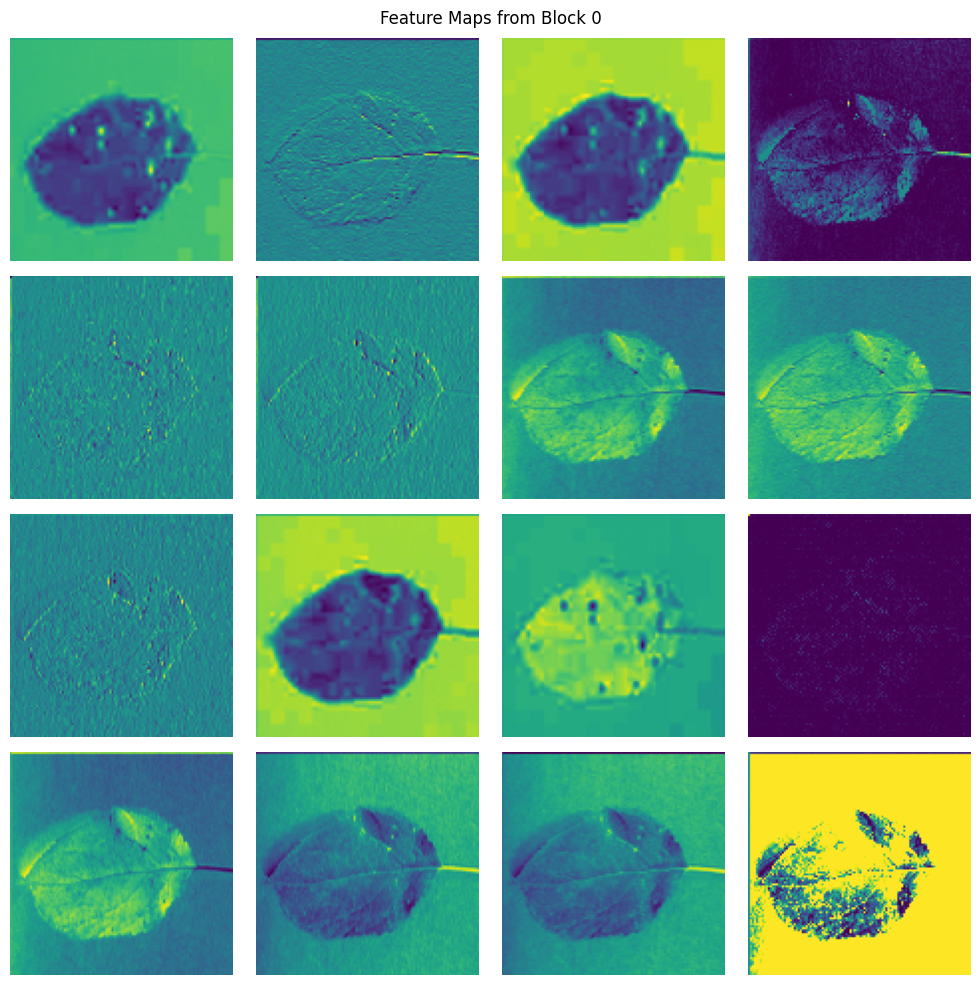

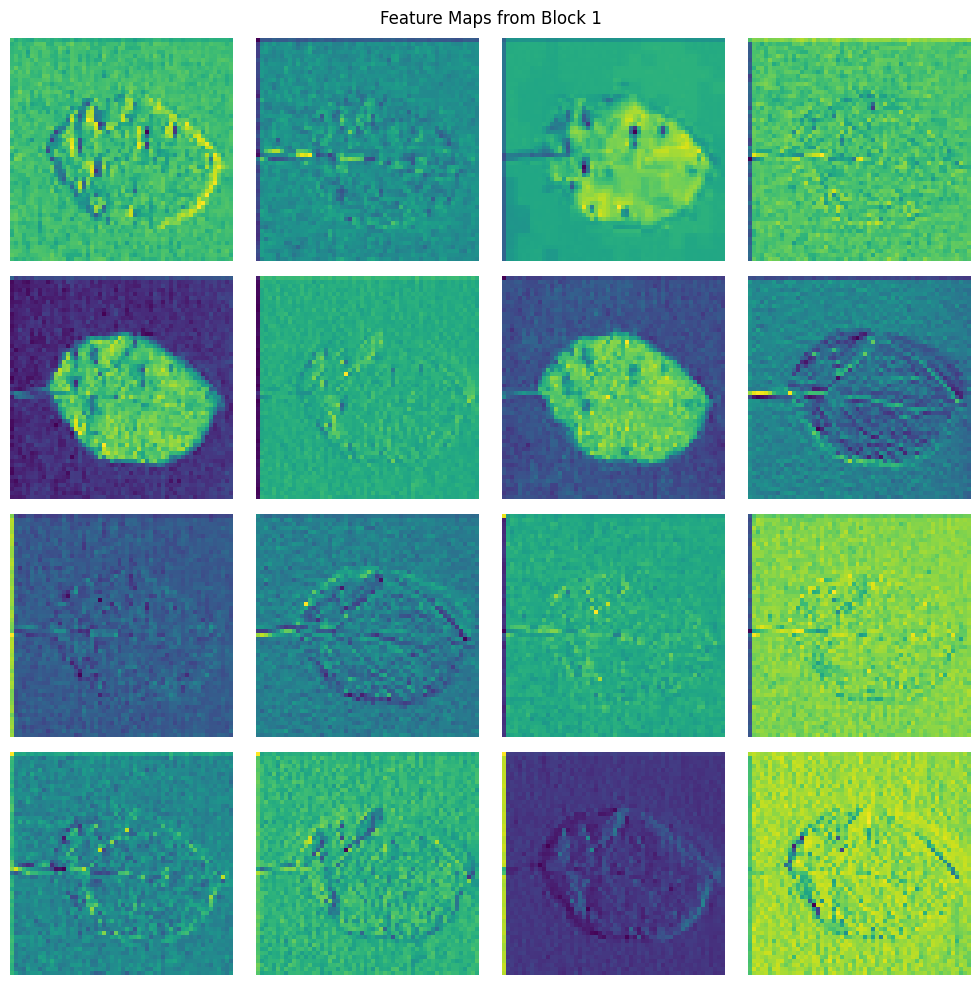

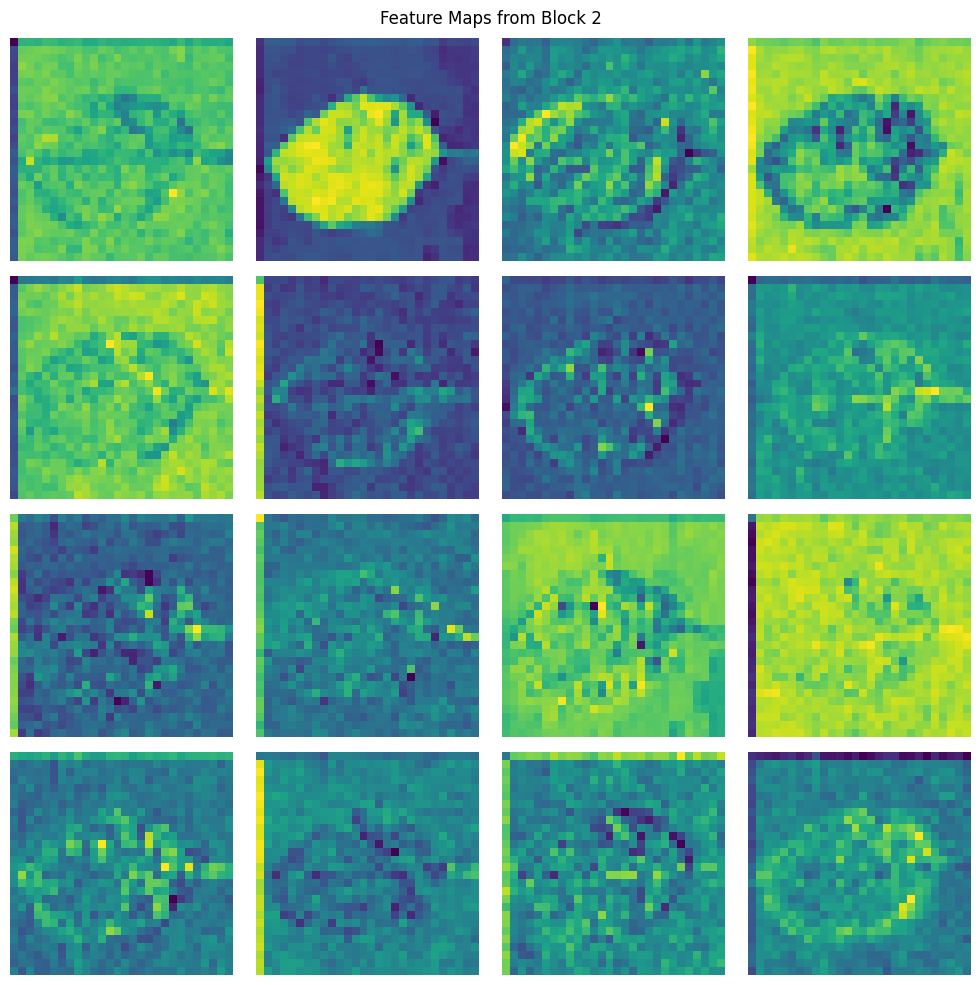

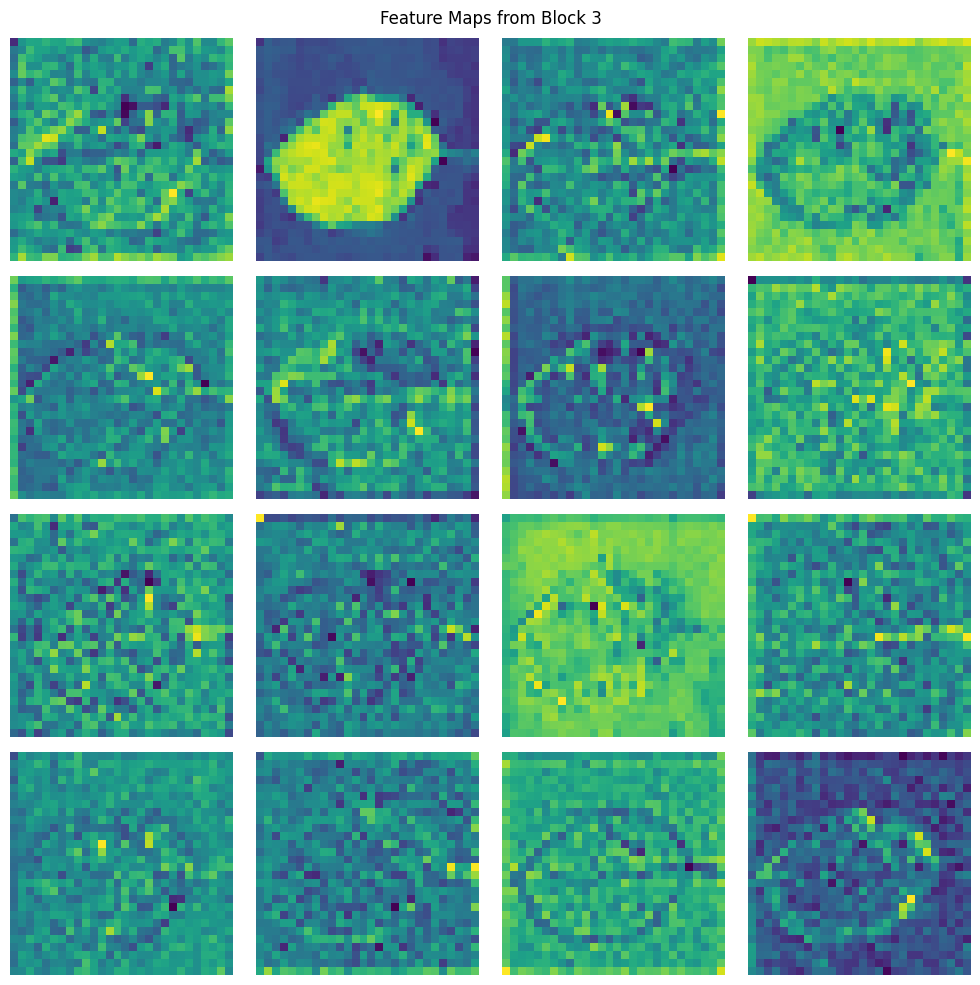

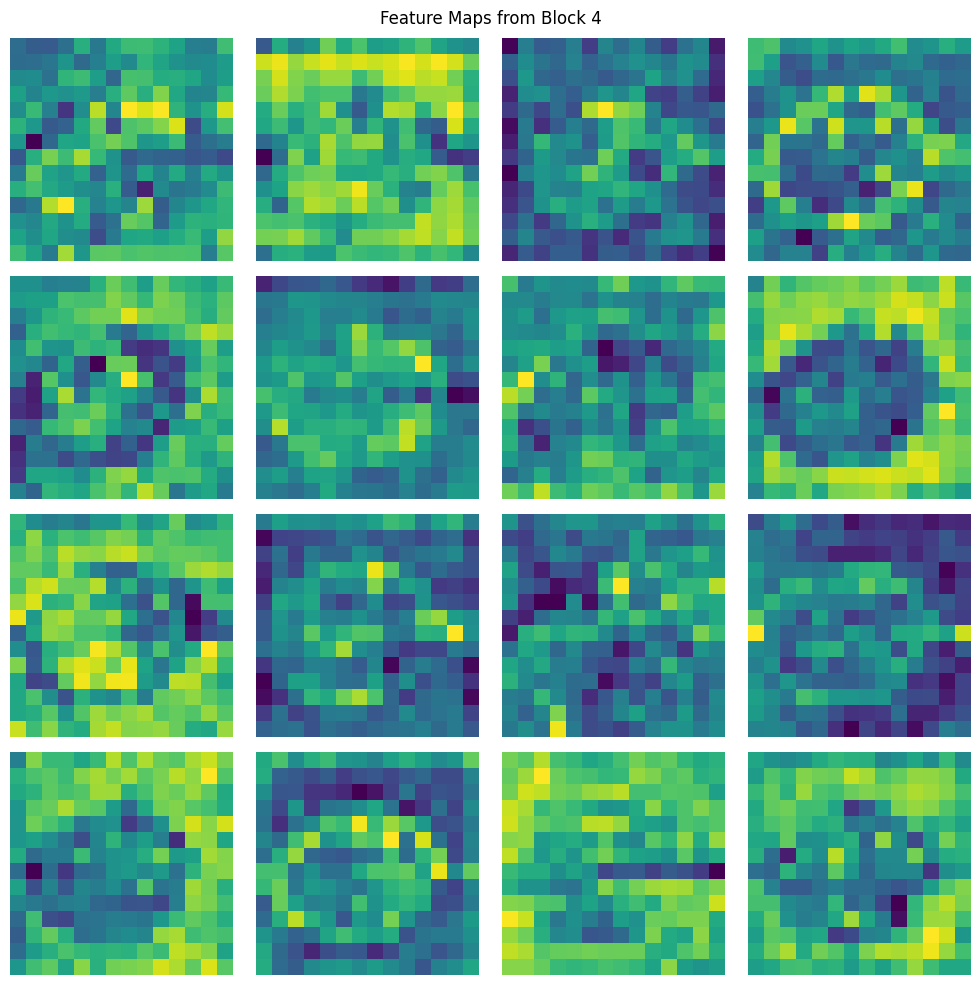

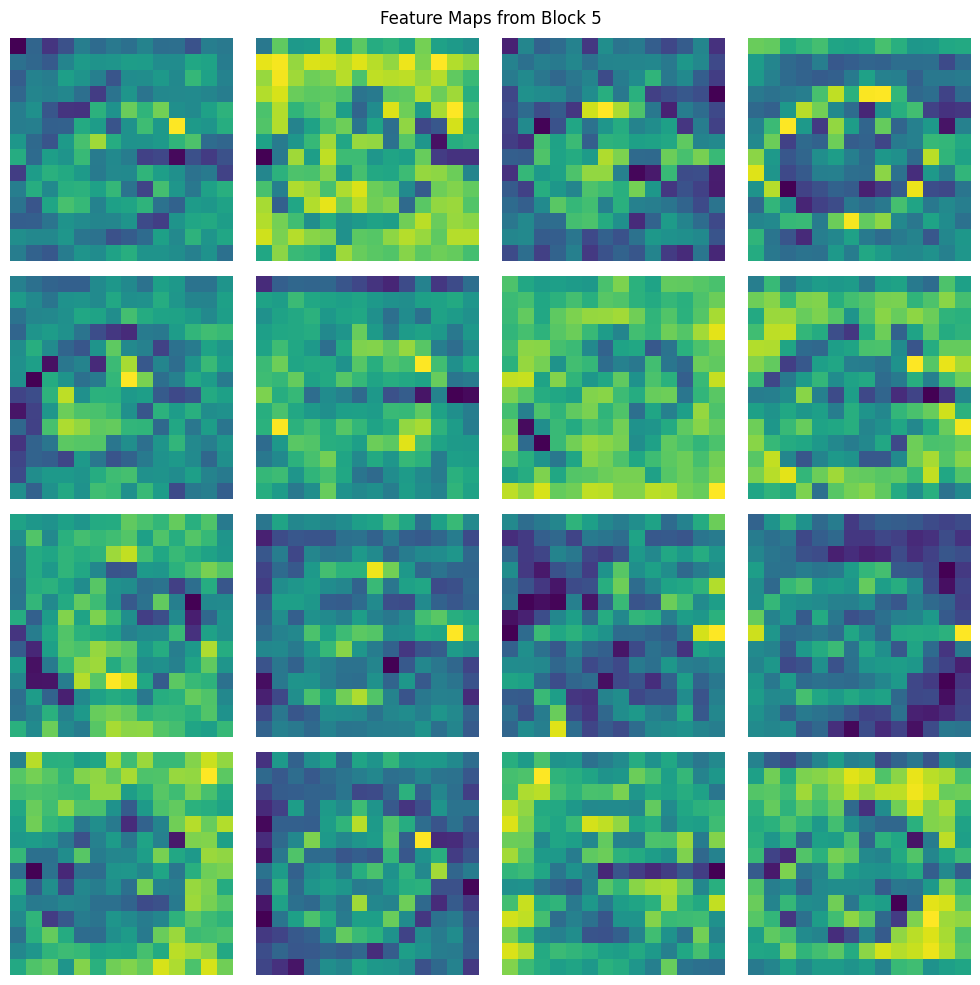

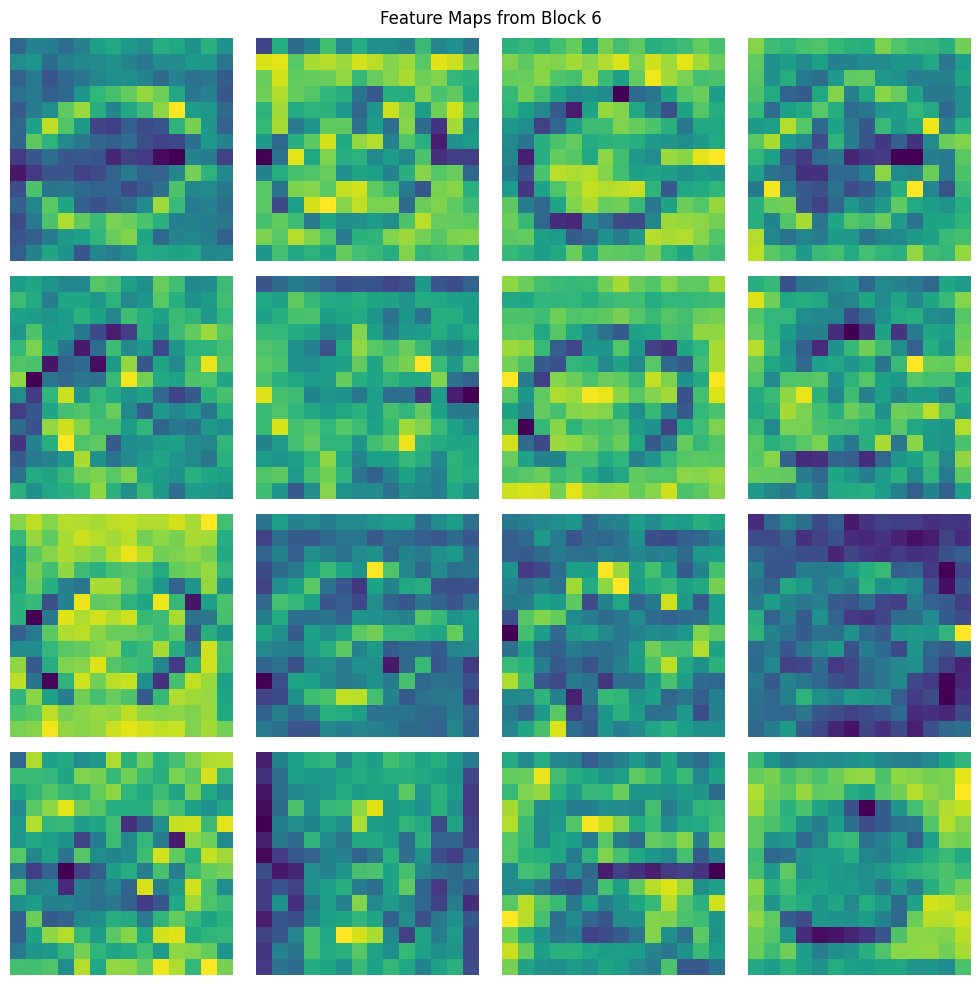

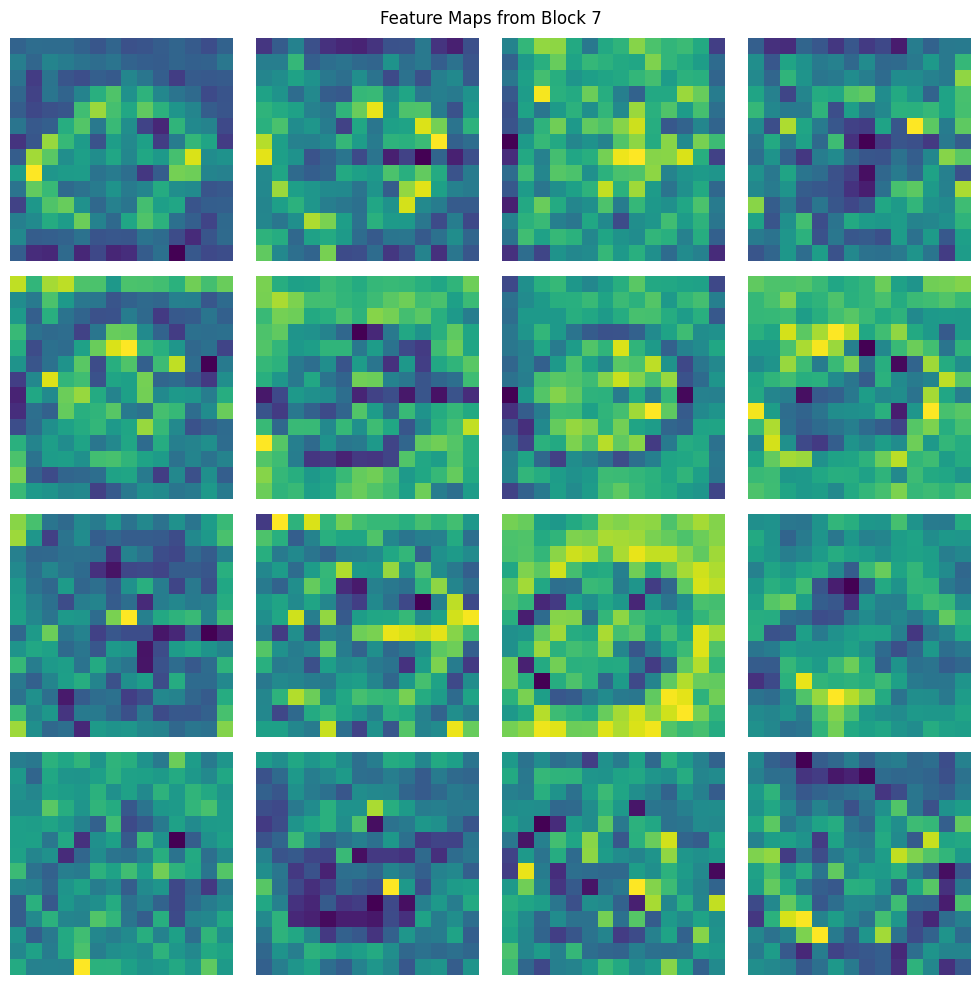

In [36]:
impath=r"C:\Users\Avijit\Desktop\DATASET\PlantVillage\Apple___Cedar_apple_rust\0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807_90deg.JPG"
for i in range(0,8):
 visualize_feature_maps(model,impath,device,hookid=i,hookname=f'block{i}')

In [37]:
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.001)

In [38]:
from tqdm.auto import tqdm

In [39]:
def train(model, dataloader, lossfn, optimizer, device):
    model.train()
    trainloss, trainacc = 0, 0

    for batch, (x, y) in tqdm(enumerate(dataloader), total=len(dataloader), desc='Training', leave=False):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = lossfn(pred, y)
        trainloss += loss.item()

        prob = torch.argmax(pred, dim=1)
        trainacc += accuracy_score(y.detach().cpu().numpy(), prob.detach().cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 200 == 0:
            tqdm.write(f"🟩 Looked at {batch * len(x)}/{len(dataloader.dataset)} | Loss: {loss.item():.4f}")

    trainloss /= len(dataloader)
    trainacc /= len(dataloader)
    print(f"\n✅ TRAINING COMPLETE — Loss: {trainloss:.4f} | Accuracy: {trainacc:.4f}")
    return trainloss, trainacc

def test(model, dataloader, lossfn, device):
    model.eval()
    testloss, testacc = 0, 0

    with torch.inference_mode():
        for batch, (x, y) in tqdm(enumerate(dataloader), total=len(dataloader), desc='Testing', leave=False):
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = lossfn(pred, y)
            testloss += loss.item()

            prob = torch.argmax(pred, dim=1)
            testacc += accuracy_score(y.detach().cpu().numpy(), prob.detach().cpu().numpy())

            if batch % 400 == 0:
                tqdm.write(f"🟦 Looked at {batch * len(x)}/{len(dataloader.dataset)} | Loss: {loss.item():.4f}")

    testloss /= len(dataloader)
    testacc /= len(dataloader)
    print(f"\n🔎 TESTING COMPLETE — Loss: {testloss:.4f} | Accuracy: {testacc:.4f}")
    return testloss, testacc

In [40]:
from torch.utils.tensorboard import SummaryWriter
writer=SummaryWriter(log_dir='runs11/experiment1')

In [41]:

best_acc = 0.0             
best_model_state = None    
patience = 4
counter = 0
min_delta = 0.001         

train_loss, train_acc, test_loss, test_acc = [], [], [], []

epochs=25
for epoch in tqdm(range(epochs), desc='Training', ncols=150):
    print(f"\nEpoch --> [{epoch+1}]")
    
    trainloss, trainacc = train(model, trainloader, loss, optimizer, device)
    testloss, testacc = test(model, testloader, loss, device)
    writer.add_scalar("Loss/Train", trainloss, epoch)
    writer.add_scalar("Loss/Test", testloss, epoch)
    writer.add_scalar("Accuracy/Train", trainacc, epoch)
    writer.add_scalar("Accuracy/Test", testacc, epoch)

    train_loss.append(trainloss)
    train_acc.append(trainacc)
    test_loss.append(testloss)
    test_acc.append(testacc)

    # 🔍 Check for improvement in test accuracy
    if testacc > best_acc + min_delta:
        best_acc = testacc
        counter = 0
        best_model_state = model.state_dict()  # Save best model in memory
        print(f"✅ Best model updated at epoch {epoch+1} with test accuracy: {testacc:.4f}")
    else:
        counter += 1
        print(f"🛑 No improvement. Patience: {counter}/{patience}")

    if counter >= patience:
        print(f"\n⛔ Early stopping triggered at epoch {epoch+1}. Best accuracy: {best_acc:.4f}")
        break

if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"\n🎯 Best model loaded with test accuracy: {best_acc:.4f}")
writer.close()



Training:   0%|                                                                                               …


Epoch --> [1]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 3.6430
🟩 Looked at 10000/56405 | Loss: 0.6963
🟩 Looked at 20000/56405 | Loss: 0.4585
🟩 Looked at 30000/56405 | Loss: 0.2075
🟩 Looked at 40000/56405 | Loss: 0.1378
🟩 Looked at 50000/56405 | Loss: 0.0932

✅ TRAINING COMPLETE — Loss: 0.4793 | Accuracy: 0.9024


Testing:   0%|          | 0/283 [00:00<?, ?it/s]

🟦 Looked at 0/14102 | Loss: 0.2138

🔎 TESTING COMPLETE — Loss: 0.1924 | Accuracy: 0.9483
✅ Best model updated at epoch 1 with test accuracy: 0.9483

Epoch --> [2]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 0.1942
🟩 Looked at 10000/56405 | Loss: 0.2304
🟩 Looked at 20000/56405 | Loss: 0.1370
🟩 Looked at 30000/56405 | Loss: 0.0833
🟩 Looked at 40000/56405 | Loss: 0.1457
🟩 Looked at 50000/56405 | Loss: 0.0939

✅ TRAINING COMPLETE — Loss: 0.1755 | Accuracy: 0.9527


Testing:   0%|          | 0/283 [00:00<?, ?it/s]

🟦 Looked at 0/14102 | Loss: 0.1242

🔎 TESTING COMPLETE — Loss: 0.1402 | Accuracy: 0.9594
✅ Best model updated at epoch 2 with test accuracy: 0.9594

Epoch --> [3]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 0.1423
🟩 Looked at 10000/56405 | Loss: 0.1796
🟩 Looked at 20000/56405 | Loss: 0.1540
🟩 Looked at 30000/56405 | Loss: 0.0869
🟩 Looked at 40000/56405 | Loss: 0.1188
🟩 Looked at 50000/56405 | Loss: 0.1623

✅ TRAINING COMPLETE — Loss: 0.1322 | Accuracy: 0.9625


Testing:   0%|          | 0/283 [00:00<?, ?it/s]

🟦 Looked at 0/14102 | Loss: 0.1099

🔎 TESTING COMPLETE — Loss: 0.1184 | Accuracy: 0.9640
✅ Best model updated at epoch 3 with test accuracy: 0.9640

Epoch --> [4]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 0.0598
🟩 Looked at 10000/56405 | Loss: 0.1996
🟩 Looked at 20000/56405 | Loss: 0.0489
🟩 Looked at 30000/56405 | Loss: 0.2520
🟩 Looked at 40000/56405 | Loss: 0.0674
🟩 Looked at 50000/56405 | Loss: 0.2294

✅ TRAINING COMPLETE — Loss: 0.1190 | Accuracy: 0.9654


Testing:   0%|          | 0/283 [00:00<?, ?it/s]

🟦 Looked at 0/14102 | Loss: 0.2659

🔎 TESTING COMPLETE — Loss: 0.1102 | Accuracy: 0.9663
✅ Best model updated at epoch 4 with test accuracy: 0.9663

Epoch --> [5]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 0.1655
🟩 Looked at 10000/56405 | Loss: 0.1550
🟩 Looked at 20000/56405 | Loss: 0.0393
🟩 Looked at 30000/56405 | Loss: 0.2199
🟩 Looked at 40000/56405 | Loss: 0.0333
🟩 Looked at 50000/56405 | Loss: 0.2231

✅ TRAINING COMPLETE — Loss: 0.1101 | Accuracy: 0.9663


Testing:   0%|          | 0/283 [00:00<?, ?it/s]

🟦 Looked at 0/14102 | Loss: 0.0052

🔎 TESTING COMPLETE — Loss: 0.1028 | Accuracy: 0.9666
🛑 No improvement. Patience: 1/4

Epoch --> [6]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 0.0997
🟩 Looked at 10000/56405 | Loss: 0.0873
🟩 Looked at 20000/56405 | Loss: 0.1016
🟩 Looked at 30000/56405 | Loss: 0.0603
🟩 Looked at 40000/56405 | Loss: 0.0843
🟩 Looked at 50000/56405 | Loss: 0.2119

✅ TRAINING COMPLETE — Loss: 0.1022 | Accuracy: 0.9676


Testing:   0%|          | 0/283 [00:00<?, ?it/s]

🟦 Looked at 0/14102 | Loss: 0.0383

🔎 TESTING COMPLETE — Loss: 0.0961 | Accuracy: 0.9695
✅ Best model updated at epoch 6 with test accuracy: 0.9695

Epoch --> [7]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 0.0996
🟩 Looked at 10000/56405 | Loss: 0.0679
🟩 Looked at 20000/56405 | Loss: 0.1314
🟩 Looked at 30000/56405 | Loss: 0.0997
🟩 Looked at 40000/56405 | Loss: 0.0550
🟩 Looked at 50000/56405 | Loss: 0.1462

✅ TRAINING COMPLETE — Loss: 0.0948 | Accuracy: 0.9695


Testing:   0%|          | 0/283 [00:00<?, ?it/s]

🟦 Looked at 0/14102 | Loss: 0.0112

🔎 TESTING COMPLETE — Loss: 0.0949 | Accuracy: 0.9688
🛑 No improvement. Patience: 1/4

Epoch --> [8]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 0.1054
🟩 Looked at 10000/56405 | Loss: 0.1379
🟩 Looked at 20000/56405 | Loss: 0.0412
🟩 Looked at 30000/56405 | Loss: 0.0559
🟩 Looked at 40000/56405 | Loss: 0.1224
🟩 Looked at 50000/56405 | Loss: 0.0507

✅ TRAINING COMPLETE — Loss: 0.0897 | Accuracy: 0.9713


Testing:   0%|          | 0/283 [00:00<?, ?it/s]

🟦 Looked at 0/14102 | Loss: 0.0337

🔎 TESTING COMPLETE — Loss: 0.0910 | Accuracy: 0.9707
✅ Best model updated at epoch 8 with test accuracy: 0.9707

Epoch --> [9]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 0.0492
🟩 Looked at 10000/56405 | Loss: 0.1369
🟩 Looked at 20000/56405 | Loss: 0.1346
🟩 Looked at 30000/56405 | Loss: 0.0355
🟩 Looked at 40000/56405 | Loss: 0.0756
🟩 Looked at 50000/56405 | Loss: 0.1052

✅ TRAINING COMPLETE — Loss: 0.0875 | Accuracy: 0.9719


Testing:   0%|          | 0/283 [00:00<?, ?it/s]

🟦 Looked at 0/14102 | Loss: 0.0496

🔎 TESTING COMPLETE — Loss: 0.0895 | Accuracy: 0.9702
🛑 No improvement. Patience: 1/4

Epoch --> [10]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 0.1319
🟩 Looked at 10000/56405 | Loss: 0.0482
🟩 Looked at 20000/56405 | Loss: 0.0562
🟩 Looked at 30000/56405 | Loss: 0.1281
🟩 Looked at 40000/56405 | Loss: 0.0440
🟩 Looked at 50000/56405 | Loss: 0.1650

✅ TRAINING COMPLETE — Loss: 0.0883 | Accuracy: 0.9708


Testing:   0%|          | 0/283 [00:00<?, ?it/s]

🟦 Looked at 0/14102 | Loss: 0.2365

🔎 TESTING COMPLETE — Loss: 0.0874 | Accuracy: 0.9706
🛑 No improvement. Patience: 2/4

Epoch --> [11]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 0.0863
🟩 Looked at 10000/56405 | Loss: 0.0767
🟩 Looked at 20000/56405 | Loss: 0.0253
🟩 Looked at 30000/56405 | Loss: 0.0422
🟩 Looked at 40000/56405 | Loss: 0.1121
🟩 Looked at 50000/56405 | Loss: 0.0652

✅ TRAINING COMPLETE — Loss: 0.0860 | Accuracy: 0.9713


Testing:   0%|          | 0/283 [00:00<?, ?it/s]

🟦 Looked at 0/14102 | Loss: 0.0398

🔎 TESTING COMPLETE — Loss: 0.0889 | Accuracy: 0.9701
🛑 No improvement. Patience: 3/4

Epoch --> [12]


Training:   0%|          | 0/1129 [00:00<?, ?it/s]

🟩 Looked at 0/56405 | Loss: 0.0892
🟩 Looked at 10000/56405 | Loss: 0.0112
🟩 Looked at 20000/56405 | Loss: 0.0494
🟩 Looked at 30000/56405 | Loss: 0.0130
🟩 Looked at 40000/56405 | Loss: 0.0844
🟩 Looked at 50000/56405 | Loss: 0.0387

✅ TRAINING COMPLETE — Loss: 0.0834 | Accuracy: 0.9712


Testing:   0%|          | 0/283 [00:00<?, ?it/s]

🟦 Looked at 0/14102 | Loss: 0.0871

🔎 TESTING COMPLETE — Loss: 0.0838 | Accuracy: 0.9705
🛑 No improvement. Patience: 4/4

⛔ Early stopping triggered at epoch 12. Best accuracy: 0.9707

🎯 Best model loaded with test accuracy: 0.9707


In [55]:
dummy_input = torch.randn(1, 3, 227, 227).to(device)  
writer.add_graph(model, dummy_input)


In [56]:
images, labels = next(iter(trainloader))

# Log input images
img_grid = torchvision.utils.make_grid(images[:16])  # First 16 images
writer.add_image('Sample Inputs', img_grid)


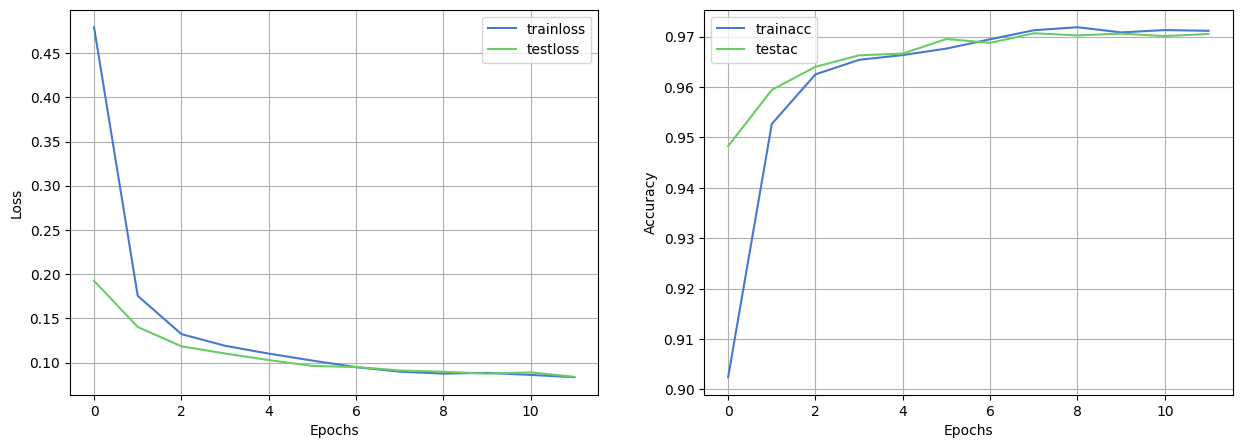

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_loss,)
plt.plot(test_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['trainloss','testloss'])
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(train_acc,)
plt.plot(test_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['trainacc','testac'])
plt.grid(True)
plt.show()

In [44]:
y_pred,y_true=[],[]
model.eval()
with torch.inference_mode():
    for (xsam,ysam) in (testloader):
        xsam,ysam=xsam.to(device),ysam.to(device)
        testpred=model(xsam)
        testpred=torch.softmax(testpred,dim=1)
        testprob=torch.argmax(testpred,dim=1)
        y_pred.extend(testprob.detach().cpu().numpy())
        y_true.extend(ysam.detach().cpu().numpy())

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(100,70))
sns.heatmap(cm,fmt='d',annot=True,cmap=plt.cm.turbo,xticklabels=plotdata.classes,yticklabels=plotdata.classes,linecolor='white',linewidths=1.0)
plt.xticks(fontsize=30,rotation=60)
plt.yticks(fontsize=20,rotation=60)
plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

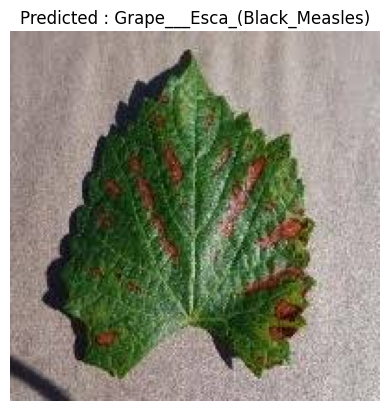

In [56]:
from PIL import Image
img=Image.open(r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\TESTIMAGE\grape_esca.jpeg").convert("RGB")
transform = v2.Compose([
    v2.Resize((224, 224)),                            # Resize to AlexNet input size
    v2.ToImage(),                                     # Needed before color transforms
    v2.ToDtype(torch.float32, scale=True),            # Scale to [0, 1]
    v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
    ])

transform_img=transform(img).unsqueeze(0).to(device)
with torch.inference_mode():
    logit=model(transform_img)
    pred=torch.softmax(logit,dim=1)
    prob=torch.argmax(pred,dim=1)
class_name=plotdata.classes
plt.imshow(img)
plt.title(f"Predicted : {class_name[prob]}")
plt.axis(False)

In [57]:
torch.save(model, r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\MODELS_DISEASE_DETECT\mobilenet.pth")

In [58]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato__Target_Spot',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___S